In [ ]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [21]:
df_US = df[df['job_country']=='Germany']
df_skills = df_US.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
907,python,Data Scientist,4157
906,python,Data Engineer,3524
1139,sql,Data Engineer,3145
1138,sql,Data Analyst,2947
905,python,Data Analyst,2309
...,...,...,...
1377,zoom,Machine Learning Engineer,1
26,angular,Senior Data Scientist,1
12,alteryx,Cloud Engineer,1
1380,zoom,Senior Data Scientist,1


In [7]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles)[0:3]

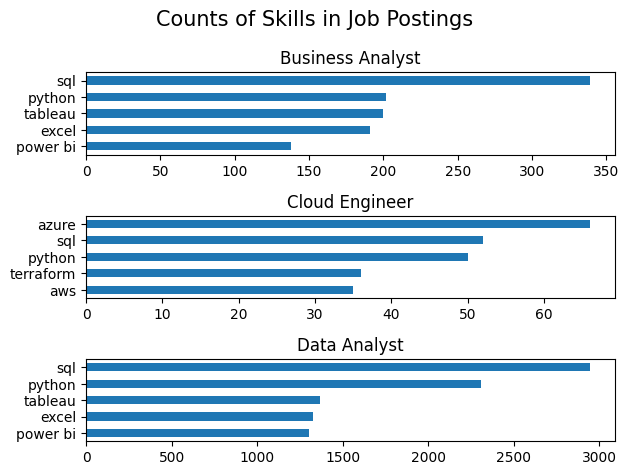

In [14]:
fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)

    ax[i].set_ylabel('')
    ax[i].invert_yaxis()
    ax[i].legend().set_visible(False)
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.tight_layout()
plt.show()

In [19]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='total_jobs')

df_job_title_count

,job_title_short,total_jobs
0,Data Analyst,7131
1,Data Scientist,6745
2,Data Engineer,6675
3,Senior Data Engineer,2041
4,Senior Data Scientist,1737
5,Senior Data Analyst,1216
6,Business Analyst,817
7,Software Engineer,741
8,Machine Learning Engineer,402
9,Cloud Engineer,189


In [24]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_percent['skill_percent'] = 100 * df_skills_percent['skill_count'] / df_skills_percent['total_jobs']
df_skills_percent

,job_skills,job_title_short,skill_count,total_jobs,skill_percent
0,python,Data Scientist,4157,6745,61.630838
1,python,Data Engineer,3524,6675,52.794007
2,sql,Data Engineer,3145,6675,47.116105
3,sql,Data Analyst,2947,7131,41.326602
4,python,Data Analyst,2309,7131,32.379750
...,...,...,...,...,...
1377,zoom,Machine Learning Engineer,1,402,0.248756
1378,angular,Senior Data Scientist,1,1737,0.057571
1379,alteryx,Cloud Engineer,1,189,0.529101
1380,zoom,Senior Data Scientist,1,1737,0.057571


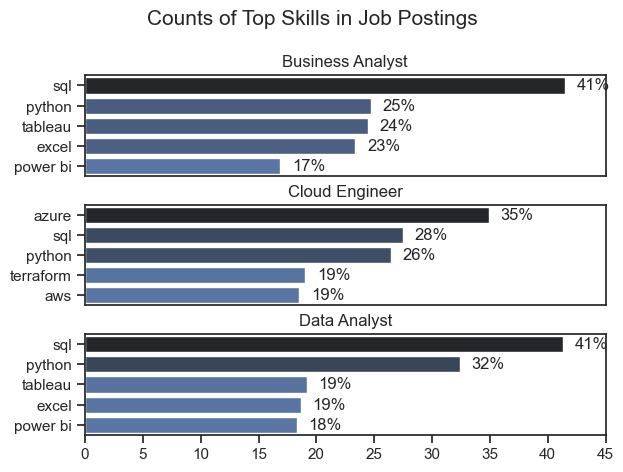

In [46]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', hue='skill_count', ax=ax[i], palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 45)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show()